Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8076 - loss: 0.6117 - val_accuracy: 0.9789 - val_loss: 0.0655
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9679 - loss: 0.1071 - val_accuracy: 0.9839 - val_loss: 0.0491
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9783 - loss: 0.0732 - val_accuracy: 0.9892 - val_loss: 0.0346
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9879 - val_loss: 0.0346
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9864 - loss: 0.0488 - val_accuracy: 0.9905 - val_loss: 0.0280
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9875 - loss: 0.0433 - val_accuracy: 0.9908 - val_loss: 0.0283
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9883 - loss: 0.0361 - val_accuracy: 0.9911 - val_loss: 0.0274
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9893 - loss: 0.0344 - va

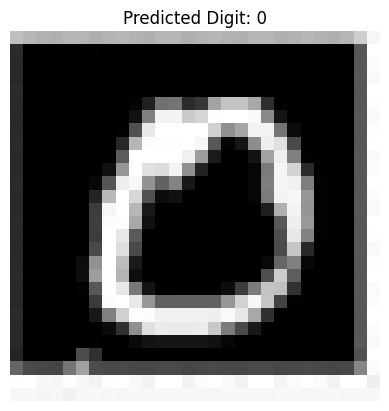

Prediction probabilities for C:\Users\pavit\OneDrive\Pictures\Screenshots\charac.png: [9.9999321e-01 3.1029870e-11 5.6472977e-06 3.9061632e-11 3.7612075e-08
 1.9552369e-09 7.1981685e-07 2.2044579e-09 1.5390157e-07 3.0489602e-07]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


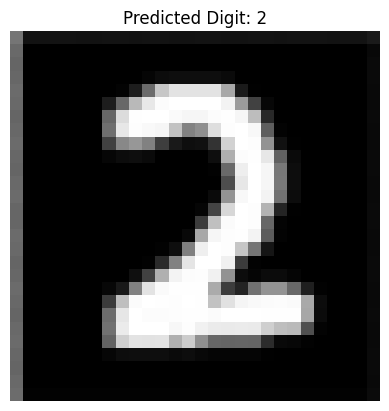

Prediction probabilities for C:\Users\pavit\OneDrive\Pictures\Screenshots\chhh2.png: [1.0892346e-09 1.3414640e-07 9.9999821e-01 1.7628343e-08 1.4085591e-12
 1.5579362e-14 1.8575919e-13 1.6472751e-06 2.6472859e-09 1.6171825e-13]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


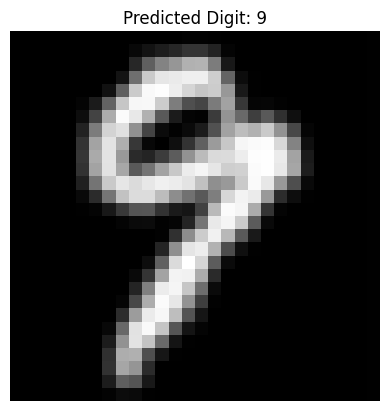

Prediction probabilities for C:\Users\pavit\OneDrive\Pictures\Screenshots\Screenshot (284).png: [3.3626666e-06 4.1151918e-03 4.0212590e-03 7.4674673e-03 5.3225289e-04
 6.3677944e-05 1.7095932e-07 4.4999495e-01 1.3376141e-02 5.2042562e-01]


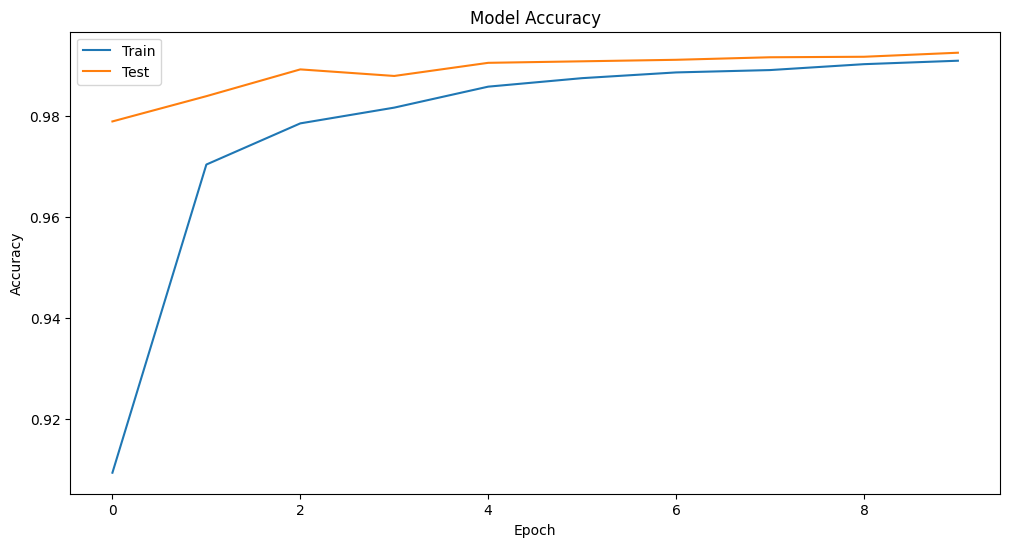

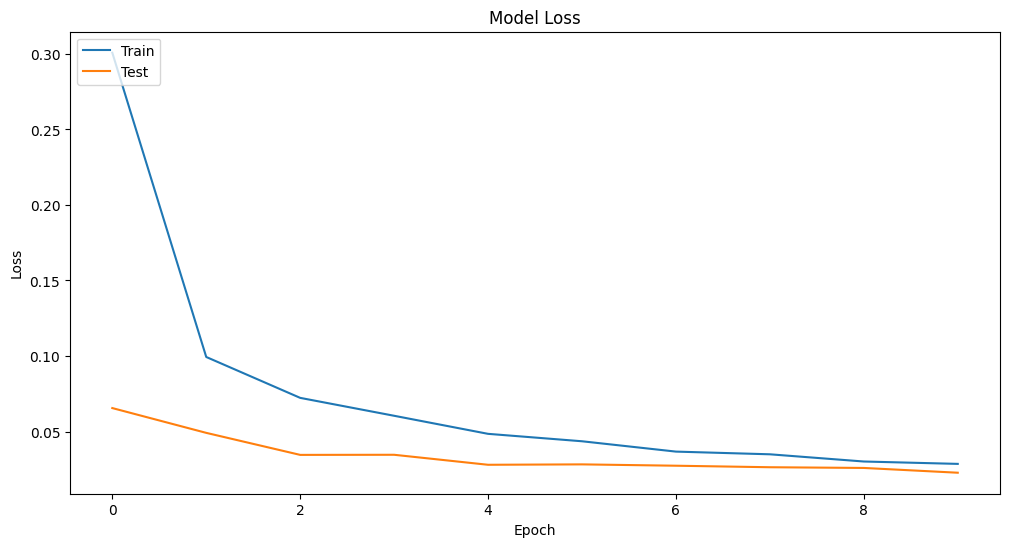

313/313 - 1s - 5ms/step - accuracy: 0.9925 - loss: 0.0227
Test accuracy: 0.9925


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the images to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=120)

# Save the model
model.save('mnist_model.keras')

# Load the model
model = load_model('mnist_model.keras')


# List of image paths you want to predict
image_paths = [
   r"C:\Users\pavit\OneDrive\Pictures\Screenshots\charac.png",
   r"C:\Users\pavit\OneDrive\Pictures\Screenshots\chhh2.png",
   r"C:\Users\pavit\OneDrive\Pictures\Screenshots\Screenshot (284).png"
]

# Loop through each image path
for image_path in image_paths:
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28

    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)[0]
    predicted_digit = np.argmax(predictions)

    # Show the image and prediction
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    plt.show()

    # Print the prediction probabilities
    print(f"Prediction probabilities for {image_path}: {predictions}")

# Plot accuracy over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')
